In [67]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
def coin_flip():
    return random.choice([True, False])

In [84]:
def num_flips(flips=2**16):
    i = 1
    heads = 0
    tracker = []
    while i <= flips:
        if coin_flip():
            heads += 1
        if math.log2(i) % 1 == 0 or i == flips:
            tracker.append((i, heads))
        i += 1
    return tracker

trk1 = list(zip(*num_flips()))


def ratio_flips(list):
    return [list[1][x] / list[0][x] for x in range(len(list[0]))]
    

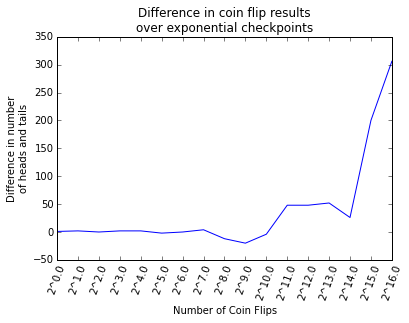

In [168]:
plt.plot([trk1[1][x] - (trk1[0][x] - trk1[1][x]) for x in range(len(trk1[0]))])
plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]], rotation = 70)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Difference in number\nof heads and tails")
plt.title("Difference in coin flip results\nover exponential checkpoints")
plt.show()

Running this several times has generally yielded drastic changes near the end courtesy of the exponential checkpoints.

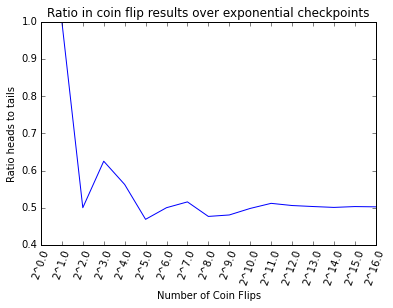

In [139]:
ratio_trk = ratio_flips(trk1)
plt.plot(ratio_trk)
plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]], rotation=70)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Ratio heads to tails")
plt.title("Ratio in coin flip results over exponential checkpoints")
plt.show()

Essentially the opposite of the graph for distance because of the small sample size for earlier checkpoints.

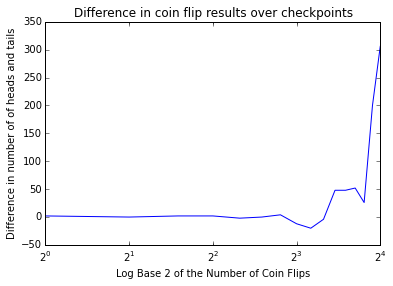

In [172]:
plt.plot([trk1[1][x] - (trk1[0][x] - trk1[1][x]) for x in range(len(trk1[0]))])
#plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]])
plt.xscale('log', basex=2)
plt.xlabel("Log Base 2 of the Number of Coin Flips")
plt.ylabel("Difference in number of of heads and tails")
plt.title("Difference in coin flip results over checkpoints")
plt.show()

A logarithmic scale shows more even more drastic differences towards the end of the data.

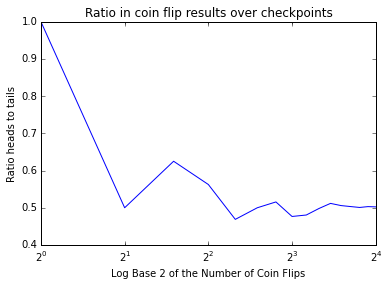

In [171]:
plt.plot(ratio_trk)
#plt.xticks(range(len(trk1[0])), ['2^'+str(round(math.log2(x), 2)) for x in trk1[0]])
plt.xscale('log', basex=2)
plt.xlabel("Log Base 2 of the Number of Coin Flips")
plt.ylabel("Ratio heads to tails")
plt.title("Ratio in coin flip results over checkpoints")
plt.show()

A logarithmic scale shows more drastic ratios near the beginning of the data

In [163]:
def num_num_flips(num=20, flips=2**16):
    matr = []
    for _ in range(num):
        matr.append(list(zip(*num_flips(flips))))
    return matr

my_matr = list(zip(*[ratio_flips(lst) for lst in num_num_flips()]))
print([st.mean(x) for x in my_matr])
print(len(my_matr))
matr_x = [2**x for x in range(len(my_matr))]

[0.5, 0.425, 0.5125, 0.48125, 0.48125, 0.4875, 0.49921875, 0.50546875, 0.4994140625, 0.5017578125, 0.4986328125, 0.4969970703125, 0.49822998046875, 0.498883056640625, 0.5000457763671875, 0.49981842041015623, 0.49999237060546875]
17


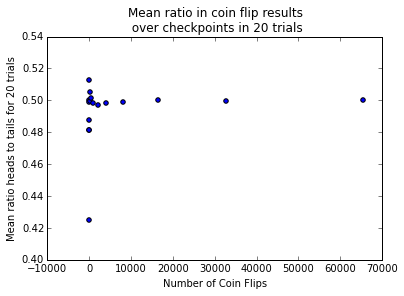

In [166]:
plt.scatter(matr_x, [st.mean(x) for x in my_matr])
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean ratio heads to tails for 20 trials")
plt.title("Mean ratio in coin flip results\n over checkpoints in 20 trials")
plt.show()

MKDOWN

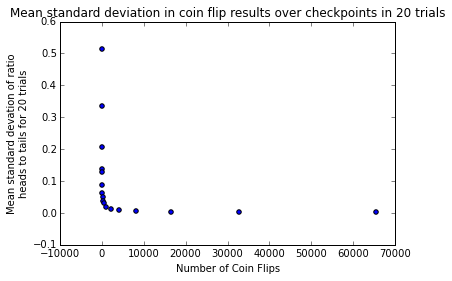

In [170]:
plt.scatter(matr_x, [st.stdev(x) for x in my_matr])
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean standard devation of ratio\nheads to tails for 20 trials")
plt.title("Mean standard deviation in coin flip results over checkpoints in 20 trials")
plt.show()

MKDOWN

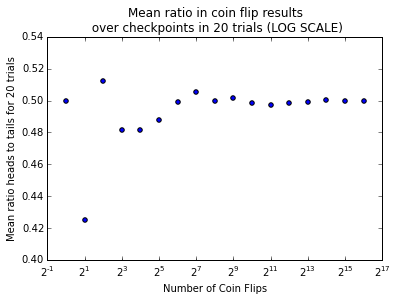

In [169]:
plt.scatter([2**x for x in range(len(my_matr))], [st.mean(x) for x in my_matr])
plt.xscale('log', basex=2)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean ratio heads to tails for 20 trials")
plt.title("Mean ratio in coin flip results\n over checkpoints in 20 trials (LOG SCALE)")
plt.show()

MKDOWN

[0.5026246899500346, 0.25520889276702025, 0.15120132970732486, 0.1288869353552297, 0.11732174328473141, 0.07240579178636558, 0.06560443756803667, 0.04264795019986307, 0.035269713650188356, 0.024562460176306103, 0.011621871173133683, 0.009202344386639085, 0.006819983199526181, 0.004571825052595023, 0.003152070001428961, 0.002384080454858506, 0.0018353629040740083]


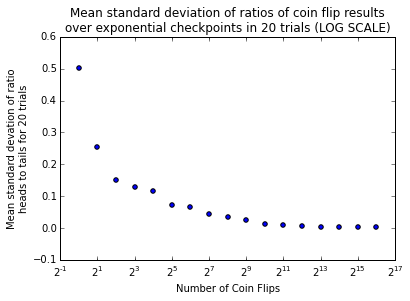

In [160]:
print([st.stdev(x) for x in my_matr])
plt.scatter([2**x for x in range(len(my_matr))], [st.stdev(x) for x in my_matr])
plt.xscale('log', basex=2)
plt.xlabel("Number of Coin Flips")
plt.ylabel("Mean standard devation of ratio\nheads to tails for 20 trials")
plt.title("Mean standard deviation of ratios of coin flip results\nover exponential checkpoints in 20 trials (LOG SCALE)")
plt.show()

MKDOWN

In [182]:
def itr_n_flips(itr, n):
    head_count = []
    for i in range(itr):
        heads = 0
        tails = 0
        for _ in range(n):
            if coin_flip():
                heads +=1
            else:
                tails +=1
        head_count.append(heads)
    return head_count

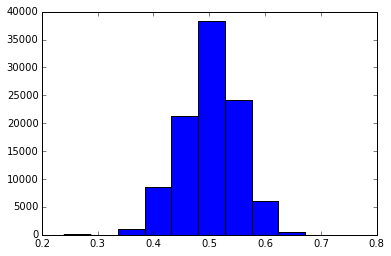

In [187]:
ck_100 = [x/100 for x in itr_n_flips(100000, 100)]
plt.hist(ck_100)
plt.show()

MKDOWN

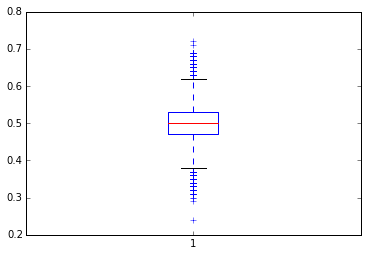

In [189]:
plt.boxplot(ck_100)
plt.show()

MKDOWN

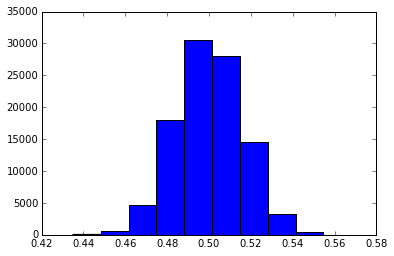

In [188]:
ck_1000 = [x/1000 for x in itr_n_flips(100000, 1000)]
plt.hist(ck_1000)
plt.show()

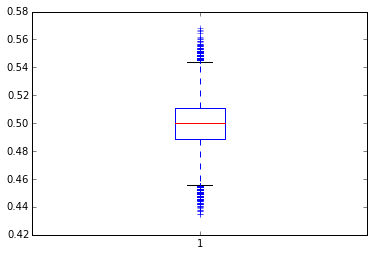

In [190]:
plt.boxplot(ck_1000)
plt.show()